# Step 1. Import libraries and load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # 1. Load data
# df = pd.read_csv('../data/jeju_card.csv')

# # 2. Map column names (Header) for translation
# column_map = {
#     '시도명': 'Province',
#     '시군구명': 'City_District',
#     '지역구분': 'Region_Type',
#     '업종명': 'Industry_Type',
#     '이용자 구분': 'User_Type',
#     '연령대': 'Age_Group',
#     '성별': 'Gender',
#     '연월': 'Year_Month',
#     '이용자수': 'User_Count',
#     '이용횟수': 'Transaction_Count',
#     '이용금액': 'Transaction_Amount'
# }

# # 3. Map data values (Content) for translation
# value_map = {
#     '시도명': {'제주도': 'Jeju-do'},
#     '시군구명': {'제주시': 'Jeju-si', '서귀포시': 'Seogwipo-si'},
#     '지역구분': {'읍면': 'Rural', '도심': 'Urban'},
#     '업종명': {
#         '유흥': 'Entertainment',
#         '식음료': 'Food_Beverage',
#         '숙박': 'Accommodation',
#         '쇼핑': 'Shopping',
#         '소매': 'Retail',
#         '문화/레져': 'Culture_Leisure',
#         '교통': 'Transportation',
#         '기타': 'Other'
#     },
#     '이용자 구분': {'제주도민': 'Jeju_Resident', '내국인관광객': 'Domestic_Tourist'},
#     '연령대': {
#         '60대이상': '60s_and_above',
#         '50대': '50s',
#         '40대': '40s',
#         '30대': '30s',
#         '20대': '20s',
#         '20대미만': 'Under_20',
#         '20 미만': 'Below_20'
#     },
#     '성별': {'여': 'F', '남': 'M'}
# }

# # 4. Apply transformations
# for col, mapping in value_map.items():
#     df[col] = df[col].replace(mapping)

# df_en = df.rename(columns=column_map)

# # 5. Save as an English version file
# df_en.to_csv('jeju_card_english.csv', index=False, encoding='utf-8-sig')

# 6. Load data (English version)
jeju_card_df = pd.read_csv('../data/jeju_card_english.csv')
jeju_card_df.head()

,Province,City_District,Region_Type,Industry_Type,User_Type,Age_Group,Gender,Year_Month,User_Count,Transaction_Count,Transaction_Amount
0,Jeju-do,Jeju-si,Rural,Entertainment,Jeju_Resident,60s_and_above,F,2018-12,23,29,4240100
1,Jeju-do,Jeju-si,Rural,Entertainment,Jeju_Resident,60s_and_above,M,2018-12,114,190,27414000
2,Jeju-do,Jeju-si,Rural,Entertainment,Jeju_Resident,50s,F,2018-12,52,71,6848000
3,Jeju-do,Jeju-si,Rural,Entertainment,Jeju_Resident,50s,M,2018-12,259,458,91468500
4,Jeju-do,Jeju-si,Rural,Entertainment,Jeju_Resident,40s,F,2018-12,77,99,10021600


# Step 2. Explore and filter the data
- Examine the dataset size, column data types, summary statistics, and whether there are any missing values.
- Filter the dataset to include only data from 2017 and 2018
(2016 was omitted due to incomplete monthly records (Sept–Dec only).)

In [2]:
jeju_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19573 entries, 0 to 19572
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Province            19573 non-null  object
 1   City_District       19573 non-null  object
 2   Region_Type         19573 non-null  object
 3   Industry_Type       19573 non-null  object
 4   User_Type           19573 non-null  object
 5   Age_Group           19573 non-null  object
 6   Gender              19573 non-null  object
 7   Year_Month          19573 non-null  object
 8   User_Count          19573 non-null  int64 
 9   Transaction_Count   19573 non-null  int64 
 10  Transaction_Amount  19573 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.6+ MB


In [3]:
jeju_card_df.describe(include='all')

,Province,City_District,Region_Type,Industry_Type,User_Type,Age_Group,Gender,Year_Month,User_Count,Transaction_Count,Transaction_Amount
count,19573,19573,19573,19573,19573,19573,19573,19573,19573.000000,19573.000000,1.957300e+04
unique,1,2,2,8,2,7,2,28,NaN,NaN,NaN
top,Jeju-do,Jeju-si,Urban,Food_Beverage,Domestic_Tourist,50s,M,2017-10,NaN,NaN,NaN
freq,19573,9852,9858,2688,9807,3376,9795,738,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2987.681347,5980.462525,2.100849e+08
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5331.172895,13623.951410,3.921408e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.000000,371.000000,1.765947e+07
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,972.000000,1376.000000,7.142090e+07
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3169.000000,5710.000000,2.169743e+08


In [4]:
object_columns = jeju_card_df.columns[jeju_card_df.dtypes == 'object']
object_columns

Index(['Province', 'City_District', 'Region_Type', 'Industry_Type',
       'User_Type', 'Age_Group', 'Gender', 'Year_Month'],
      dtype='object')

In [5]:
for col in object_columns:
    print(col)
    print(jeju_card_df[col].unique(), '\n')

Province
['Jeju-do'] 

City_District
['Jeju-si' 'Seogwipo-si'] 

Region_Type
['Rural' 'Urban'] 

Industry_Type
['Entertainment' 'Food_Beverage' 'Accommodation' 'Shopping' 'Retail'
 'Culture_Leisure' 'Transportation' 'Other'] 

User_Type
['Jeju_Resident' 'Domestic_Tourist'] 

Age_Group
['60s_and_above' '50s' '40s' '30s' 'Under_20' '20s' 'Below_20'] 

Gender
['F' 'M'] 

Year_Month
['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09'] 



In [6]:
jeju_card_df['Year'] = jeju_card_df['Year_Month'].str.split('-').str[0]
jeju_card_df = jeju_card_df[jeju_card_df['Year'] != '2016']
jeju_card_df.shape

(16707, 12)

# Step 3. Process the data
- Standardize the Age Group Labels: The values 'Below_20' and 'Under_20' represent the same group but are currently recognized as distinct categories.

In [7]:
jeju_card_df.loc[jeju_card_df['Age_Group'] == 'Below_20', 'Age_Group'] = 'Under_20'
jeju_card_df['Age_Group'].unique()

array(['60s_and_above', '50s', '40s', '30s', 'Under_20', '20s'],
      dtype=object)

# Step 4. Analyse the data
## 1) Compare monthly card spending trends
- Explore overall card spending trends by aggregating transaction data at a year–month level using groupby and sum.
- Visualize monthly card spending trends using bar charts to identify seasonal patterns.
- Aggregate card spending by year and age group to examine whether specific age segments drove the overall decline.
- Compare card spending between local residents and domestic tourists by year.
- Analyze card spending by industry category and year.

In [8]:
groupby_ym = jeju_card_df.groupby('Year_Month').sum(numeric_only=True).reset_index()
groupby_ym

,Year_Month,User_Count,Transaction_Count,Transaction_Amount
0,2017-01,2044697,3962878,158062633602
1,2017-02,1937989,3686906,142673272629
2,2017-03,2139087,4265024,158170622304
3,2017-04,2261037,4428571,164145266282
4,2017-05,2422539,4744952,174450463090
5,2017-06,2328383,4606602,166023890619
6,2017-07,2520117,5048178,177270011408
7,2017-08,2634037,5212389,178853518885
8,2017-09,2374142,4765159,168355520204
9,2017-10,2270758,4453613,164810287642


Text(0, 0.5, 'Amount (in 100M KRW)')

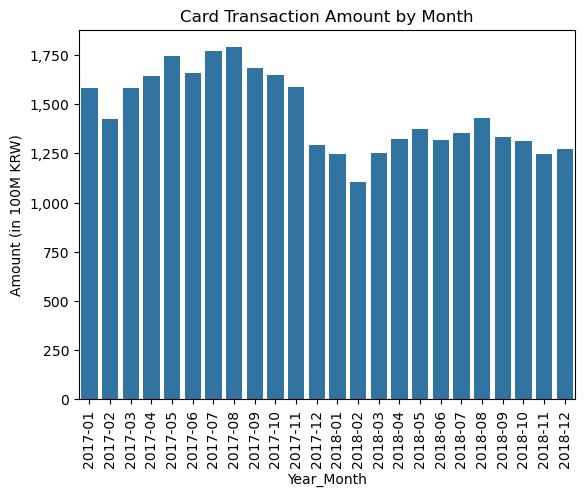

In [9]:
sns.barplot(data=groupby_ym, x='Year_Month', y='Transaction_Amount')
plt.rcParams['figure.figsize'] = (10, 5)
plt.xticks(rotation=90)
plt.title('Card Transaction Amount by Month')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('Amount (in 100M KRW)')

### Key Findings
- A consistent seasonal pattern is observed across both years, with spending dipping in winter and peaking in spring and summer, suggesting a strong link to tourism-related activity.
- While seasonality remained stable, total card spending in 2018 was lower than in 2017, indicating an overall contraction in spending.

In [10]:
group_ym_age = jeju_card_df.groupby(['Year', 'Age_Group']).sum(numeric_only=True).reset_index()
group_ym_age

,Year,Age_Group,User_Count,Transaction_Count,Transaction_Amount
0,2017,20s,4800559,9304114,208175160124
1,2017,30s,7080363,13499213,437721213544
2,2017,40s,6965143,14414930,561248406540
3,2017,50s,5158034,10314259,468286978356
4,2017,60s_and_above,2640430,5069478,260136246561
5,2017,Under_20,203078,429896,4996657612
6,2018,20s,4262563,8714136,175770246392
7,2018,30s,5759053,11372820,320955678476
8,2018,40s,6081331,12925032,442123304148
9,2018,50s,4646069,9557381,387615338975


In [11]:
jeju_card_df['Age_Group'] = pd.Categorical(jeju_card_df['Age_Group'],
                                      categories=['Under_20', '20s', '30s', '40s', '50s', '60s_and_above'],
                                      ordered=True)

Text(0, 0.5, 'Amount (in 100M KRW)')

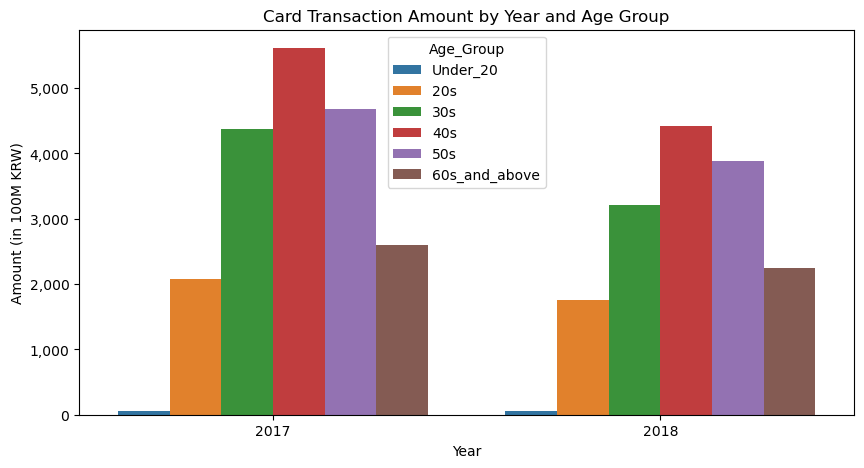

In [12]:
age_order = ['Under_20', '20s', '30s', '40s', '50s', '60s_and_above']

sns.barplot(data=group_ym_age, x='Year', y='Transaction_Amount', hue='Age_Group', hue_order=age_order)
plt.title('Card Transaction Amount by Year and Age Group')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('Amount (in 100M KRW)')

### Key Findings
- No specific age group showed a disproportionately large decline; spending decreased fairly evenly across all age groups.

In [13]:
groupby_ym_user = jeju_card_df.groupby(['Year', 'User_Type']).sum(numeric_only=True).reset_index()
groupby_ym_user

,Year,User_Type,User_Count,Transaction_Count,Transaction_Amount
0,2017,Domestic_Tourist,12761026,20113119,754434825907
1,2017,Jeju_Resident,14086581,32918771,1186129836830
2,2018,Domestic_Tourist,11179654,17830178,633357078211
3,2018,Jeju_Resident,12241253,30011987,922893881613


Text(0, 0.5, 'Amount (in 100M KRW)')

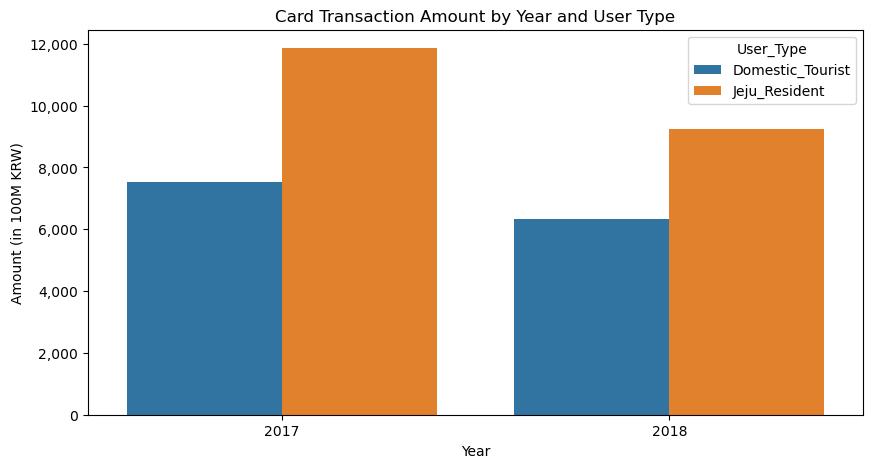

In [14]:
sns.barplot(data=groupby_ym_user, x='Year', y='Transaction_Amount', hue='User_Type')
plt.title('Card Transaction Amount by Year and User Type')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('Amount (in 100M KRW)')

### Key Findings
- Both groups experienced a similar overall decline, suggesting that user type was not a key driver of the change.

Text(0, 0.5, 'Amount (in 100M KRW)')

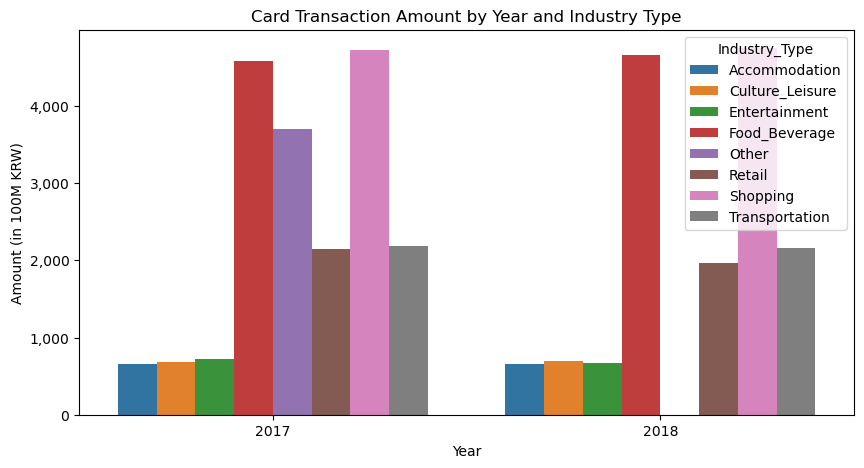

In [15]:
groupby_ym_market = jeju_card_df.groupby(['Year', 'Industry_Type']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_market, x='Year', y='Transaction_Amount', hue='Industry_Type')
plt.title('Card Transaction Amount by Year and Industry Type')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('Amount (in 100M KRW)')

In [16]:
jeju_card_df[jeju_card_df['Industry_Type'] == 'Other']

,Province,City_District,Region_Type,Industry_Type,User_Type,Age_Group,Gender,Year_Month,User_Count,Transaction_Count,Transaction_Amount,Year
8820,Jeju-do,Jeju-si,Rural,Other,Jeju_Resident,60s_and_above,F,2017-11,515,1087,68991695,2017
8821,Jeju-do,Jeju-si,Rural,Other,Jeju_Resident,60s_and_above,M,2017-11,1320,2902,248832140,2017
8822,Jeju-do,Jeju-si,Rural,Other,Jeju_Resident,50s,F,2017-11,825,1586,105991421,2017
8823,Jeju-do,Jeju-si,Rural,Other,Jeju_Resident,50s,M,2017-11,1623,3314,344444658,2017
8824,Jeju-do,Jeju-si,Rural,Other,Jeju_Resident,40s,F,2017-11,1064,1955,197205323,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
16682,Jeju-do,Seogwipo-si,Urban,Other,Domestic_Tourist,30s,F,2017-01,1126,1661,61983110,2017
16683,Jeju-do,Seogwipo-si,Urban,Other,Domestic_Tourist,30s,M,2017-01,1289,1902,54641270,2017
16684,Jeju-do,Seogwipo-si,Urban,Other,Domestic_Tourist,20s,F,2017-01,795,1060,29265651,2017
16685,Jeju-do,Seogwipo-si,Urban,Other,Domestic_Tourist,20s,M,2017-01,719,987,19987700,2017


In [17]:
jeju_card_df[jeju_card_df['Industry_Type'] == 'Other']['Year_Month'].unique()

array(['2017-11', '2017-10', '2017-09', '2017-08', '2017-07', '2017-06',
       '2017-05', '2017-04', '2017-03', '2017-02', '2017-01'],
      dtype=object)

### Key Findings
- “Other” industry category was missing data after November 2017, indicating incomplete records.
- The “Other” category will be excluded from further analysis to avoid misleading conclusions.

/var/folders/rn/p36k2cpj5kj1kbs4vnw6bq3c0000gn/T/ipykernel_96186/467047226.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_ym_age = jeju_card_df.groupby(['Year', 'Age_Group']).sum(numeric_only=True).reset_index()


Text(0, 0.5, 'Amount (in 100M KRW)')

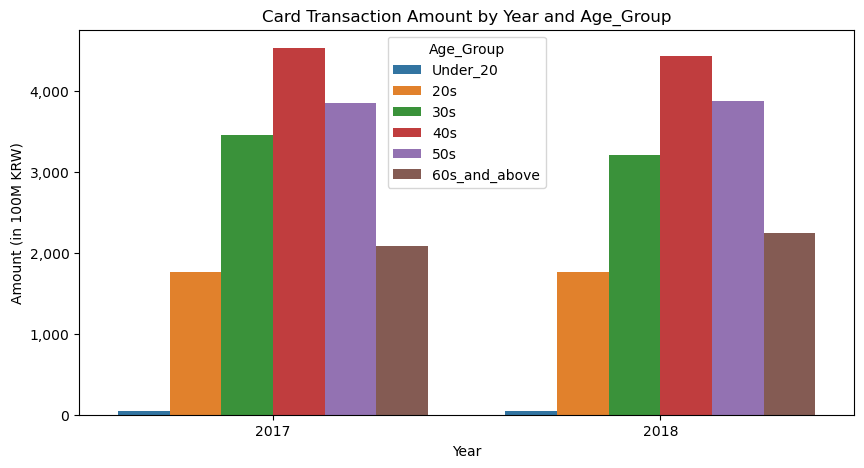

In [18]:
jeju_card_df = jeju_card_df[jeju_card_df['Industry_Type'] != 'Other']

groupby_ym_age = jeju_card_df.groupby(['Year', 'Age_Group']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_age, x='Year', y='Transaction_Amount', hue='Age_Group')
plt.title('Card Transaction Amount by Year and Age_Group')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('Amount (in 100M KRW)')


Text(0, 0.5, 'Amount (in 100M KRW)')

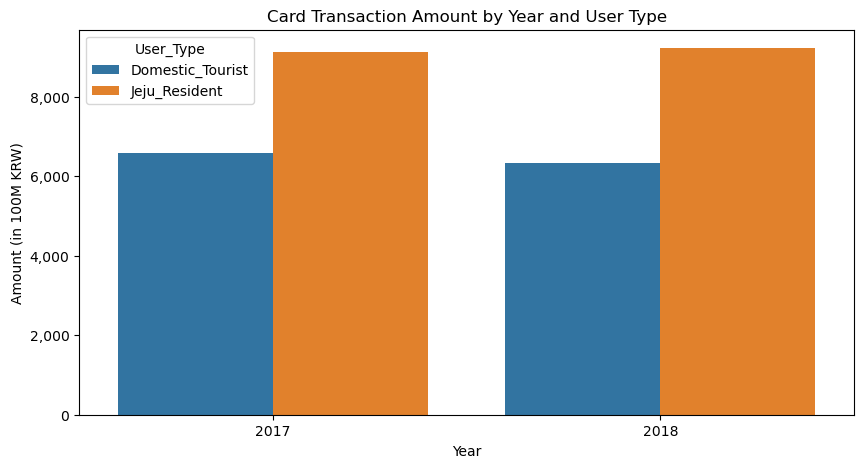

In [19]:
groupby_ym_user = jeju_card_df.groupby(['Year', 'User_Type']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_user, x='Year', y='Transaction_Amount', hue='User_Type')
plt.title('Card Transaction Amount by Year and User Type')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('Amount (in 100M KRW)')

Text(0, 0.5, 'Amount (in 100M KRW)')

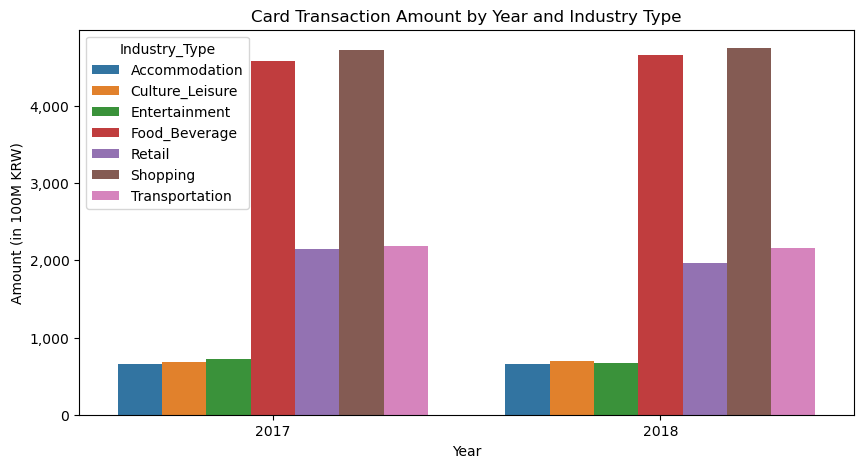

In [20]:
groupby_ym_market = jeju_card_df.groupby(['Year', 'Industry_Type']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_market, x='Year', y='Transaction_Amount', hue='Industry_Type')
plt.title('Card Transaction Amount by Year and Industry Type')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('Amount (in 100M KRW)')

### Final Conclusion
- After removing incomplete industry data, spending patterns between 2017 and 2018 appeared largely consistent.
- The apparent decline in total card spending was primarily influenced by data coverage issues, rather than meaningful behavioral changes across age groups, user types, or industries.
- This analysis highlights the importance of validating data completeness before drawing conclusions from aggregated trends.

## 2) Compare card spending by Age Group
- Aggregate card transaction data by age group to compare total users, total spending, and average spending per user.

### (1) Card spending by Age Group
- Visualize card spending by age group to identify differences in consumption patterns across age segments.

In [31]:
groupby_age = jeju_card_df.groupby('Age_Group').sum(numeric_only=True).reset_index()
groupby_age

/var/folders/rn/p36k2cpj5kj1kbs4vnw6bq3c0000gn/T/ipykernel_96186/1080079430.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age = jeju_card_df.groupby('Age_Group').sum(numeric_only=True).reset_index()


,Age_Group,User_Count,Transaction_Count,Transaction_Amount
0,Under_20,401769,879205,9478228519
1,20s,8609569,17330083,352340324557
2,30s,11943645,23231348,665648456005
3,40s,12151108,25588896,894568725640
4,50s,9141502,18600897,771684016455
5,60s_and_above,4683296,9062038,433293299324


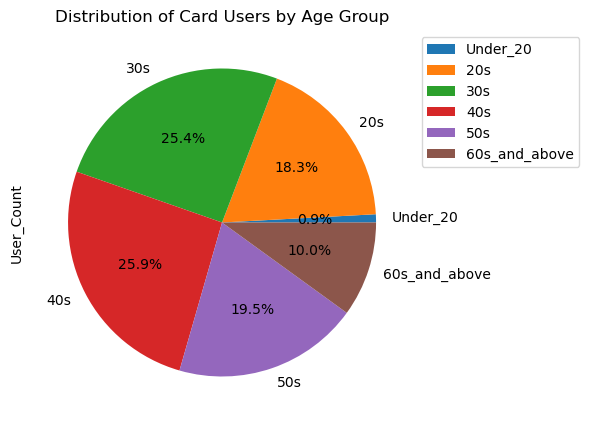

In [32]:
groupby_age.plot(kind='pie', y='User_Count', labels=groupby_age['Age_Group'], autopct='%.1f%%')
plt.title('Distribution of Card Users by Age Group')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### Key Findings
- The user distribution ranking: under 20 > 60+ > 20s > 50s > 30s > 40s.

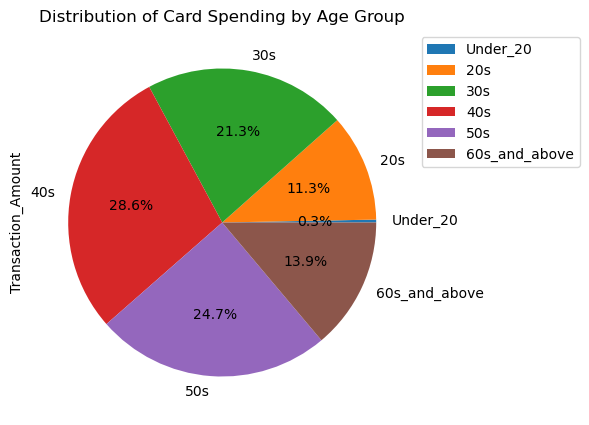

In [33]:
groupby_age.plot(kind='pie', y='Transaction_Amount', labels=groupby_age['Age_Group'], autopct='%.1f%%')
plt.title('Distribution of Card Spending by Age Group' \
'')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### Key Findings
- Users in their 20s and 30s account for a relatively smaller share of total spending compared to their user count.
- Users in their 50s and 60+ contribute a larger share of total spending despite fewer users.

In [34]:
groupby_age['Spending_Per_User'] = groupby_age['Transaction_Amount'] / groupby_age['User_Count']
groupby_age

,Age_Group,User_Count,Transaction_Count,Transaction_Amount,Spending_Per_User
0,Under_20,401769,879205,9478228519,23591.239043
1,20s,8609569,17330083,352340324557,40924.269793
2,30s,11943645,23231348,665648456005,55732.438130
3,40s,12151108,25588896,894568725640,73620.341918
4,50s,9141502,18600897,771684016455,84415.451252
5,60s_and_above,4683296,9062038,433293299324,92518.879721


Text(0.5, 1.0, 'Average Card Spending per User by Age Group')

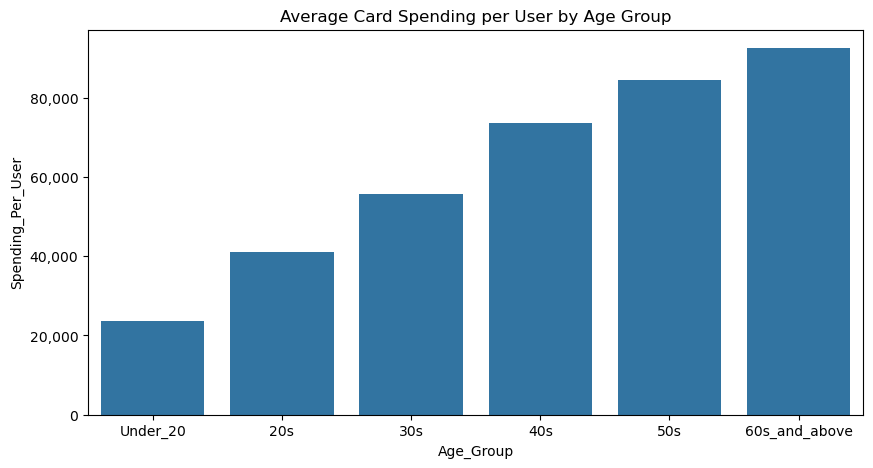

In [35]:
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
sns.barplot(data=groupby_age, x='Age_Group', y='Spending_Per_User')
plt.title('Average Card Spending per User by Age Group')

### Key Findings
- A clear trend was identified that average spending increases with age.

### (2) Card spending by Age Group and Industry
- Visualize card spending by age group and industry to examine how spending behavior varies by both demographics and business sectors.

In [26]:
groupby_age_market = jeju_card_df.groupby(['Age_Group', 'Industry_Type']).sum(numeric_only=True).reset_index()
groupby_age_market.head()

/var/folders/rn/p36k2cpj5kj1kbs4vnw6bq3c0000gn/T/ipykernel_96186/1687809090.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age_market = jeju_card_df.groupby(['Age_Group', 'Industry_Type']).sum(numeric_only=True).reset_index()


,Age_Group,Industry_Type,User_Count,Transaction_Count,Transaction_Amount
0,Under_20,Accommodation,3681,4953,114390996
1,Under_20,Culture_Leisure,40499,80073,805245645
2,Under_20,Entertainment,2176,2968,148345945
3,Under_20,Food_Beverage,130781,254934,3477626140
4,Under_20,Retail,56257,77825,1638514065


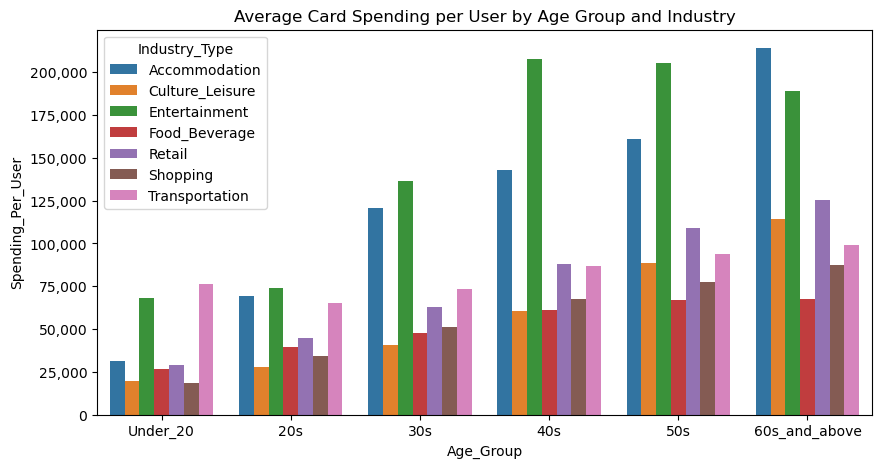

In [27]:
groupby_age_market['Spending_Per_User'] = groupby_age_market['Transaction_Amount'] / groupby_age_market['User_Count']

sns.barplot(data=groupby_age_market, x='Age_Group', y='Spending_Per_User', hue='Industry_Type')
plt.title('Average Card Spending per User by Age Group and Industry')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

### Key Findings
- Entertainment and Accommodation show the highest spending share across most age groups, despite minor differences between segments.

### (3) Card Spending by Age Group Over Time
- Visualize card spending by age group over time (by month) to analyze monthly spending trends and seasonal patterns across age groups.

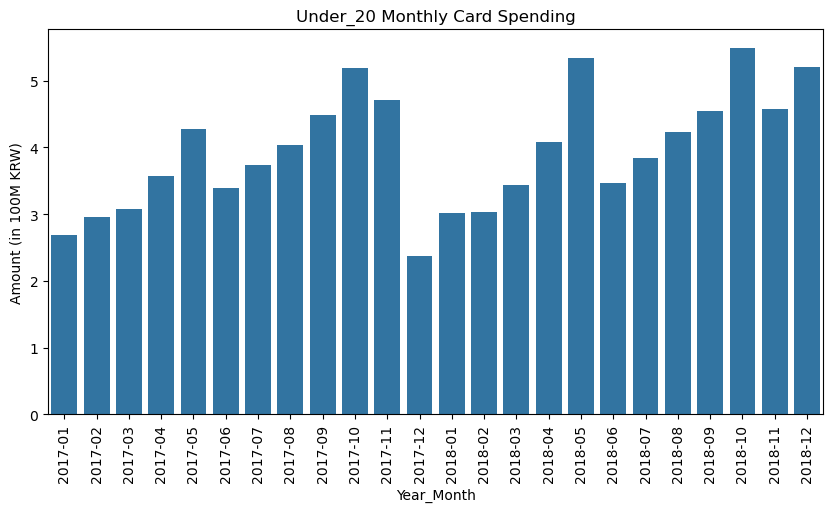

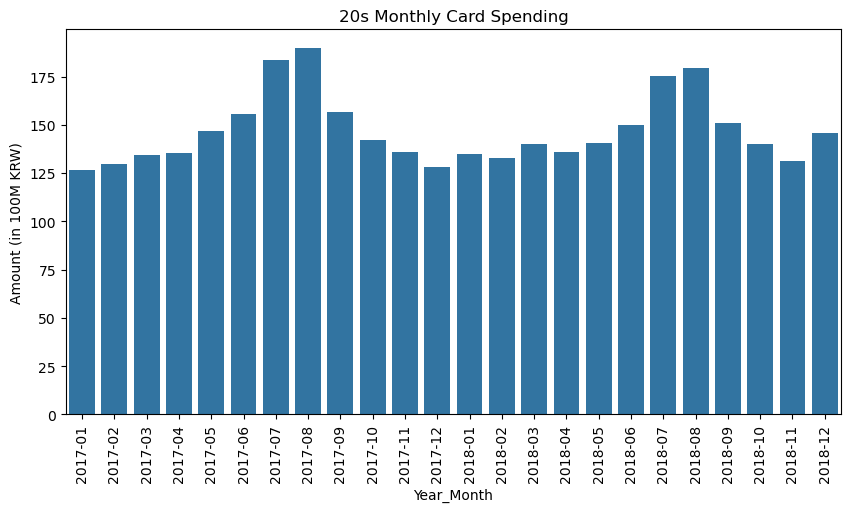

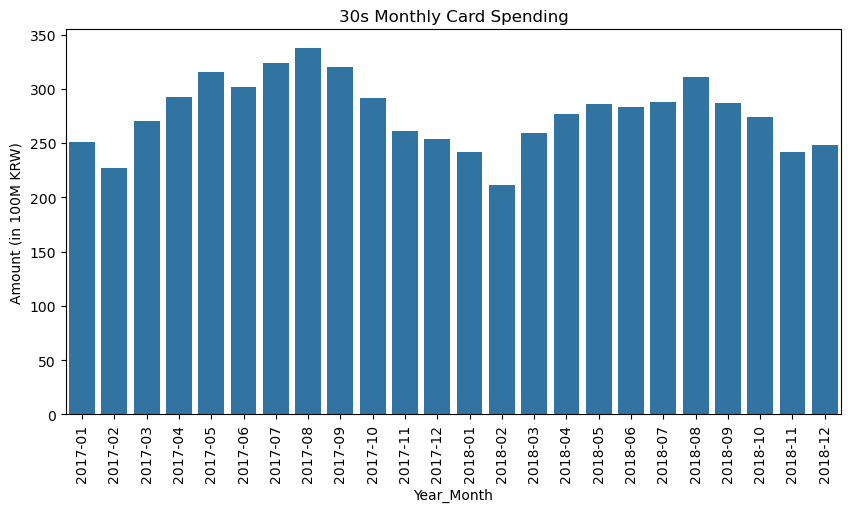

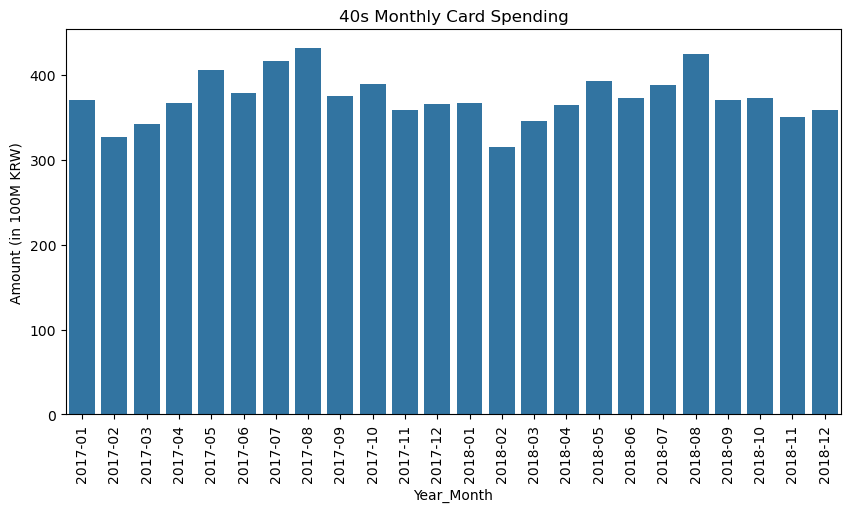

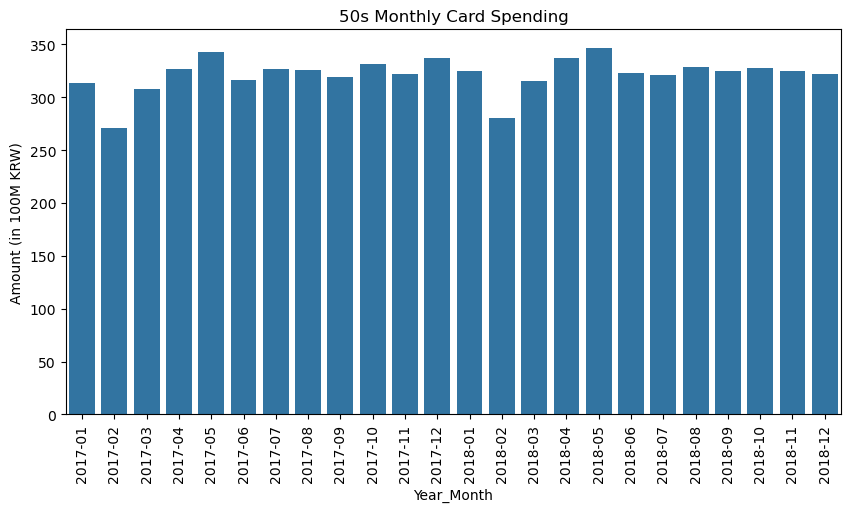

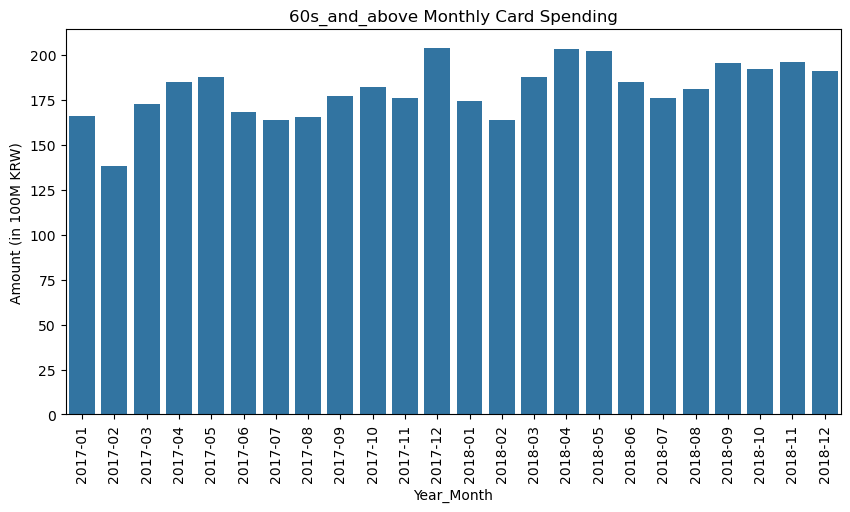

In [30]:
for age in groupby_age_ym['Age_Group'].unique():
    data = groupby_age_ym[groupby_age_ym['Age_Group'] == age]
    sns.barplot(data=data, x='Year_Month', y='Transaction_Amount')
    plt.title(f'{age} Monthly Card Spending')
    plt.xticks(rotation=90)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
    plt.ylabel('Amount (in 100M KRW)')
    plt.show()

### Key Findings
- Spending peaks in July–August overall, with the 20s group showing the steepest summer increase.
- Under-20 users peak in May and October, while 60+ users spend more in spring and early winter.
- The 50s group maintains relatively stable monthly spending, except for a February dip.